In [ ]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('gdrive/My Drive/bank-additional-full.csv')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [ ]:
df.drop(['duration'], axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
# number of rows in dataset

print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))

Bank marketing dataset consists of 41188 rows.


In [ ]:
#find percentage of missing values for each column
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

In [ ]:
#get numeric columns and then find out categorical columns

cols = df.columns

num_cols = df._get_numeric_data().columns

num_cols

list(set(cols) - set(num_cols))


['y',
 'marital',
 'loan',
 'poutcome',
 'housing',
 'month',
 'job',
 'education',
 'day_of_week',
 'contact',
 'default']

Plot All Categorical Variables Frequency

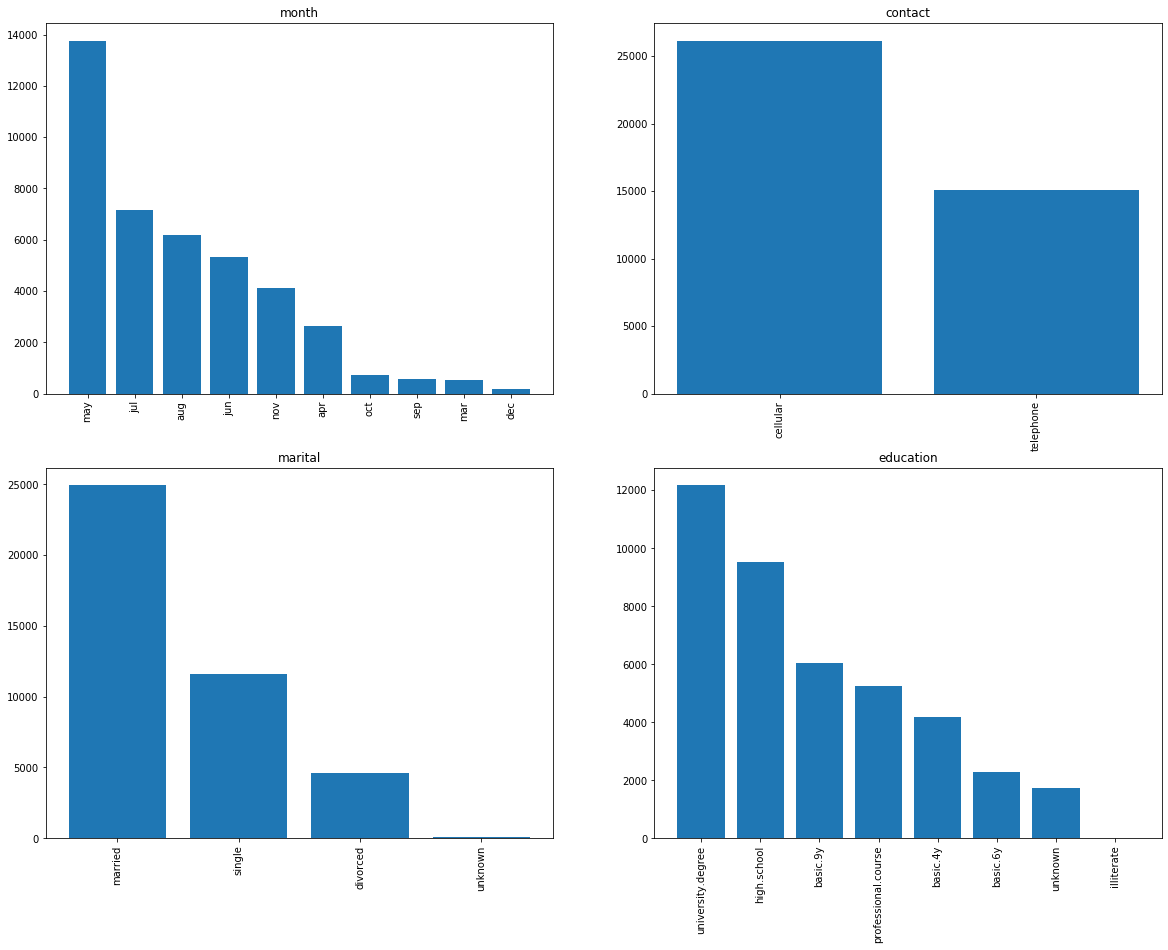

In [ ]:
cat_columns = ['month', 'contact','marital','education']

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(20, 15))


counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 2
    trace_y = counter % 2
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

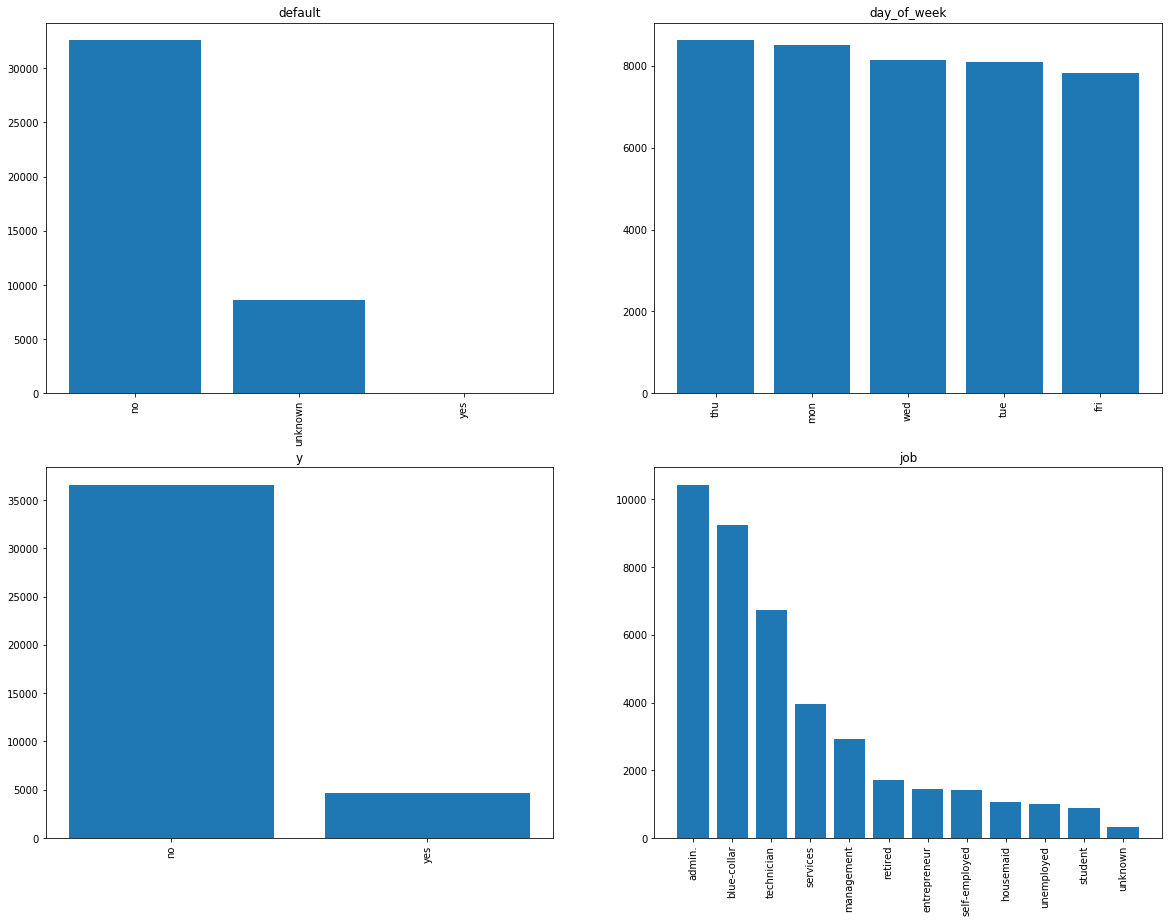

In [ ]:

cat_columns = ['default', 'day_of_week', 'y', 'job',]

fig, axs = plt.subplots(2,2, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 2
    trace_y = counter % 2
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

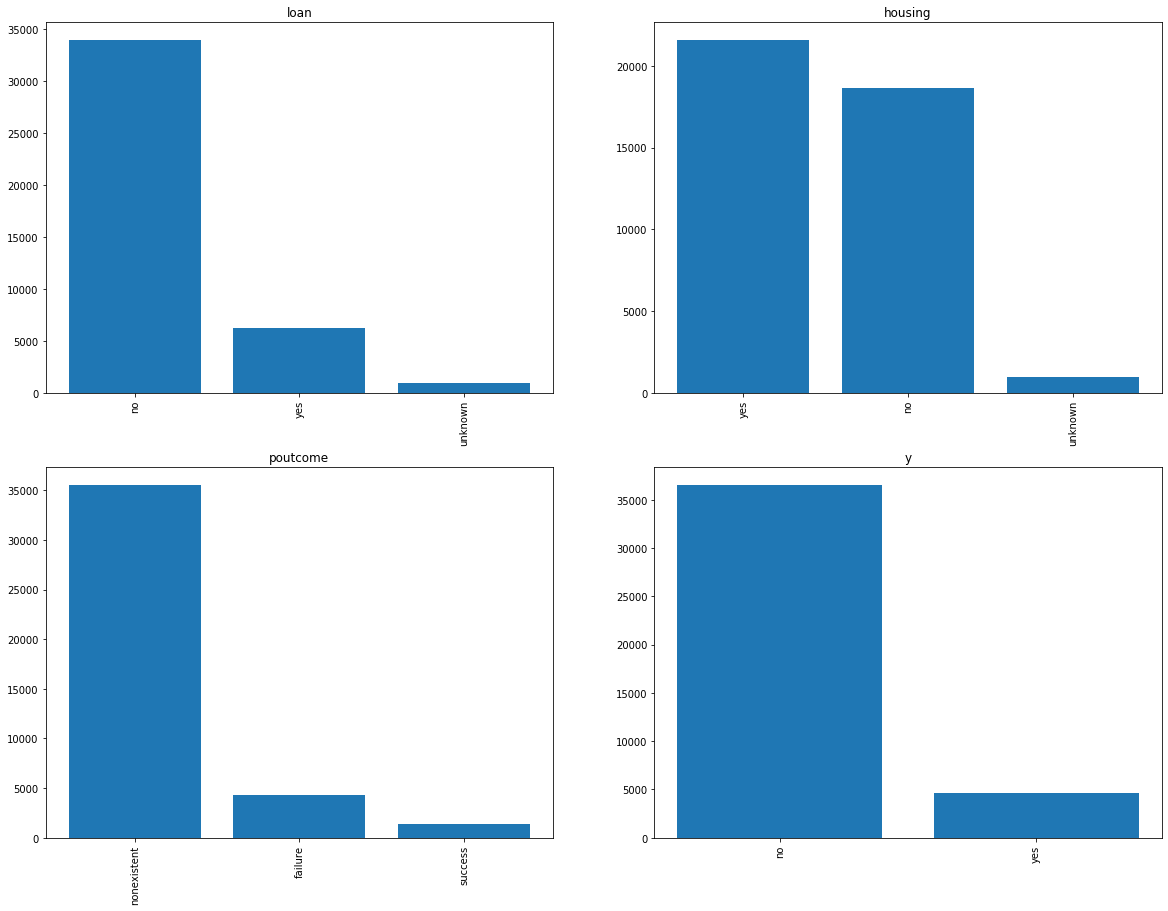

In [ ]:
cat_columns = ['loan',  'housing', 'poutcome' ,'y']

fig, axs = plt.subplots(2,2, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 2
    trace_y = counter % 2
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

Now Plot all Numerical Columns Frequency 

In [ ]:
list(set(num_cols))

['previous',
 'euribor3m',
 'campaign',
 'age',
 'nr.employed',
 'duration',
 'emp.var.rate',
 'pdays',
 'cons.price.idx',
 'cons.conf.idx']

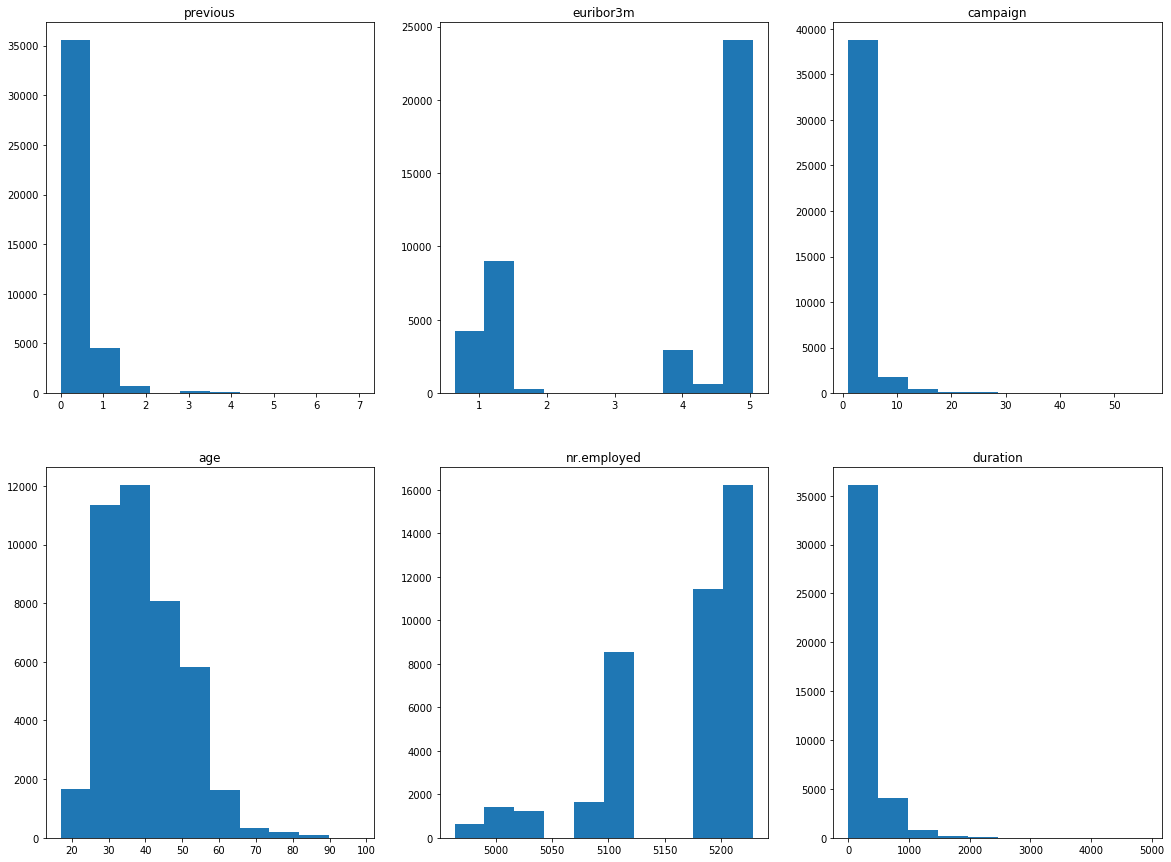

In [ ]:
num_columns = ['previous', 'euribor3m', 'campaign', 'age', 'nr.employed', 'duration']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

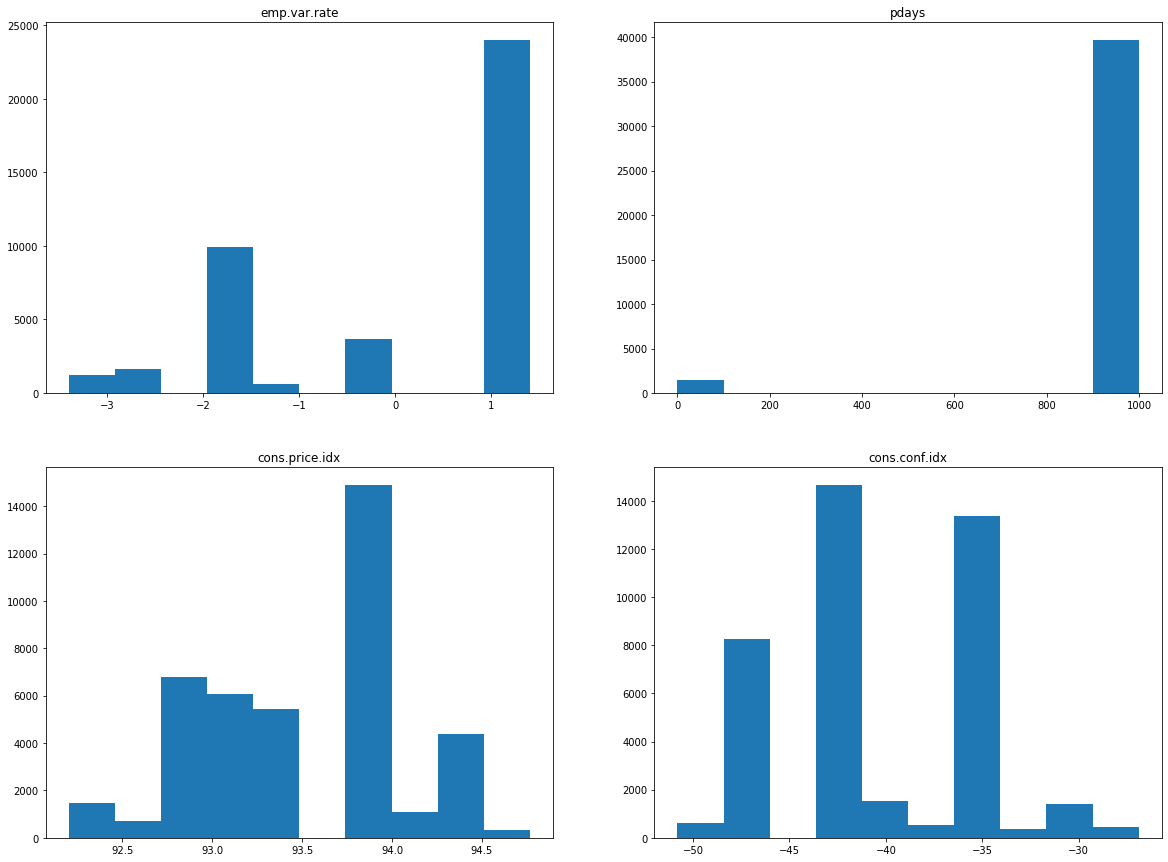

In [ ]:
num_columns = ['emp.var.rate', 'pdays','cons.price.idx', 'cons.conf.idx']

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 2
    trace_y = counter % 2
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

We can see that numerical columns have outliers (especially 'pdays', 'campaign' and 'previous' columns). 

In [ ]:
df[['pdays', 'campaign', 'previous','duration']].describe()

,pdays,campaign,previous,duration
count,41188.000000,41188.000000,41188.000000,41188.000000
mean,962.475454,2.567593,0.172963,258.285010
std,186.910907,2.770014,0.494901,259.279249
min,0.000000,1.000000,0.000000,0.000000
25%,999.000000,1.000000,0.000000,102.000000
50%,999.000000,2.000000,0.000000,180.000000
75%,999.000000,3.000000,0.000000,319.000000
max,999.000000,56.000000,7.000000,4918.000000


In [ ]:
#serperate numerical columns

numerical_df= pd.DataFrame(df,columns = ['previous', 'euribor3m', 'campaign', 'age', 'nr.employed', 'duration', 'emp.var.rate', 'pdays', 'cons.price.idx', 'cons.conf.idx'])
numerical_df.head()

,previous,euribor3m,campaign,age,nr.employed,duration,emp.var.rate,pdays,cons.price.idx,cons.conf.idx
0,0,4.857,1,56,5191.0,261,1.1,999,93.994,-36.4
1,0,4.857,1,57,5191.0,149,1.1,999,93.994,-36.4
2,0,4.857,1,37,5191.0,226,1.1,999,93.994,-36.4
3,0,4.857,1,40,5191.0,151,1.1,999,93.994,-36.4
4,0,4.857,1,56,5191.0,307,1.1,999,93.994,-36.4


In [ ]:
#replace outliers in all columns with nan in numerical columns
#numerical_df.mask(numerical_df.sub(numerical_df.mean()).div(numerical_df.std()).abs().gt(2))

v = numerical_df.values
mask = np.abs((v - v.mean(0)) / v.std(0)) > 2
numerical_df=pd.DataFrame(np.where(mask, np.nan, v), numerical_df.index, numerical_df.columns)

In [ ]:
#find percentage of missing values for each column
numerical_df.isnull().sum()

previous          1064
euribor3m            0
campaign          1377
age                985
nr.employed       3129
duration          1902
emp.var.rate      1071
pdays             1515
cons.price.idx    1165
cons.conf.idx     1481
dtype: int64

In [ ]:
numerical_df.to_csv(r'gdrive/My Drive/numerical_columns.csv')


Analysis of Labels

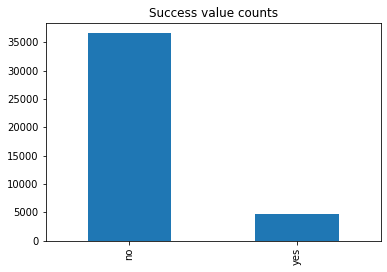

In [ ]:
value_counts = df['y'].value_counts()

value_counts.plot.bar(title = 'Success value counts')

how success column value varies depending on other categorical columns' values:



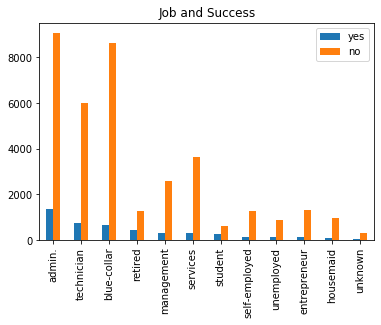

In [ ]:
#job and success
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and Success')

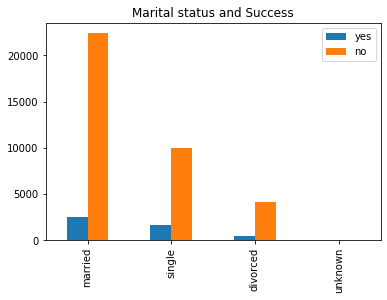

In [ ]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['y'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and Success')

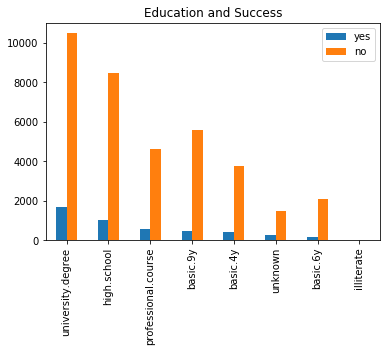

In [ ]:
#education and Success
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['y'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and Success')

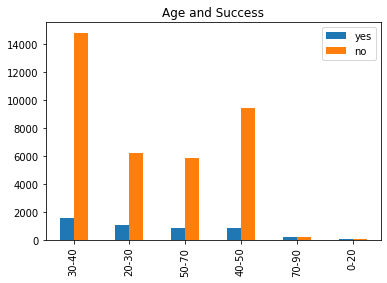

In [ ]:
#Age and Success

#add a new column category next to the age group. 
category = pd.cut(df['age'],bins=[0,20,30,40,50,70,90],labels=['0-20','20-30','30-40','40-50','50-70','70-90'])
df.insert(7,'Age Group',category)

j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['Age Group'].value_counts()
j_df['no'] = df[df['y'] == 'no']['Age Group'].value_counts()

j_df.plot.bar(title = 'Age and Success')

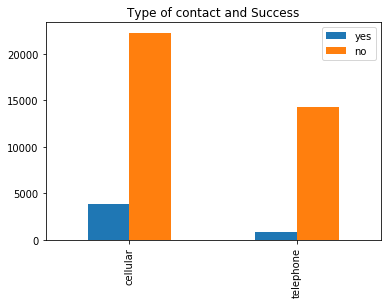

In [ ]:
#type of contact and Success
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['y'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and Success')

In [ ]:
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

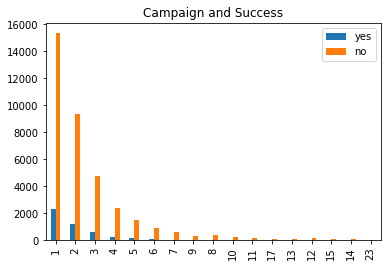

In [ ]:
#number of contacts performed during this campaign and for this client and Success
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['campaign'].value_counts()
j_df['no'] = df[df['y'] == 'no']['campaign'].value_counts()

j_df.plot.bar(title = 'Campaign and Success')

In [ ]:
df['pdays'].describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

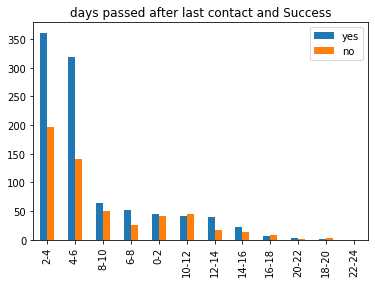

In [ ]:
#number of days that passed by after the client was last contacted from a previous campaign and Success

#add a new column category next to the pdays group. 
category = pd.cut(df['pdays'],bins=[0,2,4,6,8,10,12,14,16,18,20,22,24],labels=['0-2','2-4','4-6','6-8','8-10','10-12','12-14','14-16','16-18','18-20','20-22','22-24'])
df.insert(13,'days',category)

j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['days'].value_counts()
j_df['no'] = df[df['y'] == 'no']['days'].value_counts()

j_df.plot.bar(title = 'days passed after last contact and Success')

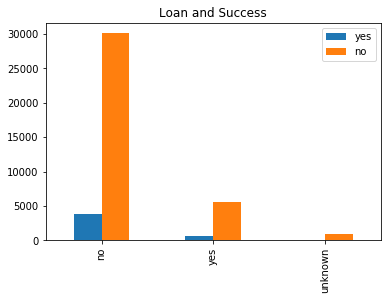

In [ ]:
#Loan and Success
#has personal loan? 
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['loan'].value_counts()
j_df['no'] = df[df['y'] == 'no']['loan'].value_counts()

j_df.plot.bar(title = 'Loan and Success')

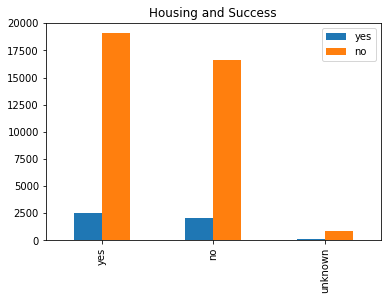

In [ ]:
#Housing and Success
#has housing loan?
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['housing'].value_counts()
j_df['no'] = df[df['y'] == 'no']['housing'].value_counts()

j_df.plot.bar(title = 'Housing and Success')

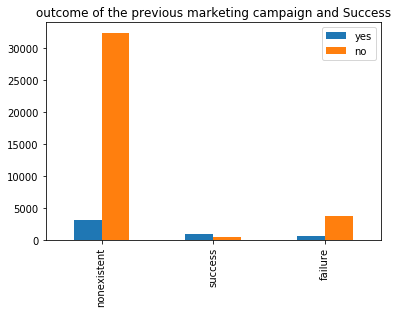

In [ ]:
#outcome of the previous marketing campaign and Success
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['poutcome'].value_counts()
j_df['no'] = df[df['y'] == 'no']['poutcome'].value_counts()

j_df.plot.bar(title = 'outcome of the previous marketing campaign and Success')

In [ ]:
list(df)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

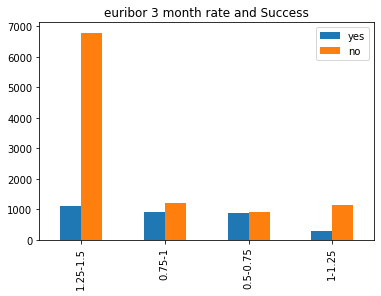

In [ ]:
# euribor 3 month rate and Success

#add a new column category next to the euribor3m group. 
category = pd.cut(df['euribor3m'],bins=[0.5,0.75,1,1.25,1.5],labels=['0.5-0.75','0.75-1','1-1.25','1.25-1.5'])
df.insert(5,'Euribor3m',category)

j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['Euribor3m'].value_counts()
j_df['no'] = df[df['y'] == 'no']['Euribor3m'].value_counts()

j_df.plot.bar(title = 'euribor 3 month rate and Success')

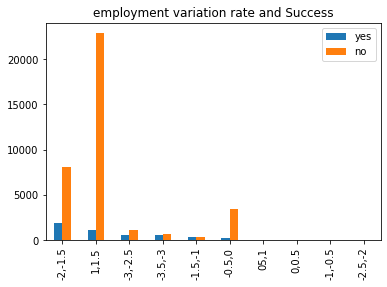

In [ ]:
# employment variation rate and Success

#add a new column category next to the emp.var.rate group. 
category = pd.cut(df['emp.var.rate'],bins=[-3.5,-3,-2.5,-2,-1.5,-1,-0.5,-0,0.5,1,1.5],labels=['-3.5,-3','-3,-2.5','-2.5,-2','-2,-1.5','-1.5,-1','-1,-0.5','-0.5,0','0,0.5','05,1','1,1.5'])
df.insert(10,'Emp.var.rate',category)

j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['Emp.var.rate'].value_counts()
j_df['no'] = df[df['y'] == 'no']['Emp.var.rate'].value_counts()

j_df.plot.bar(title = 'employment variation rate and Success')

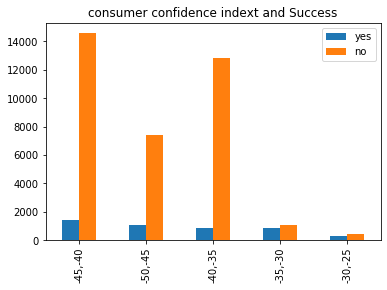

In [ ]:
#consumer confidence index - monthly indicator and Success

#add a new column category next to the cons.conf.idx group. 
category = pd.cut(df['cons.conf.idx'],bins=[-50,-45,-40,-35,-30,-25],labels=['-50,-45','-45,-40','-40,-35','-35,-30','-30,-25'])
df.insert(6,'Cons.conf.idx',category)

j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['Cons.conf.idx'].value_counts()
j_df['no'] = df[df['y'] == 'no']['Cons.conf.idx'].value_counts()

j_df.plot.bar(title = 'consumer confidence indext and Success')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f817a95c080>,
      dtype=object)

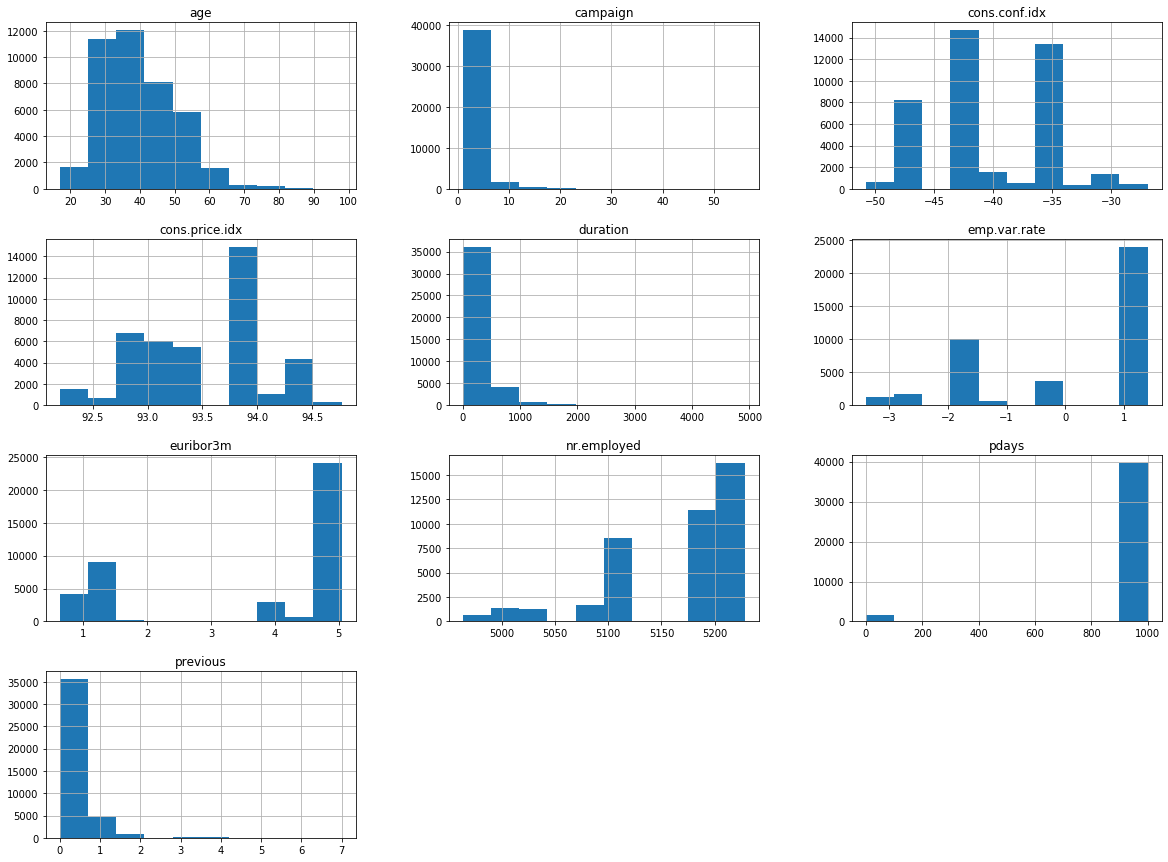

In [ ]:
df.hist( figsize=(20, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8177e26198>,
      dtype=object)

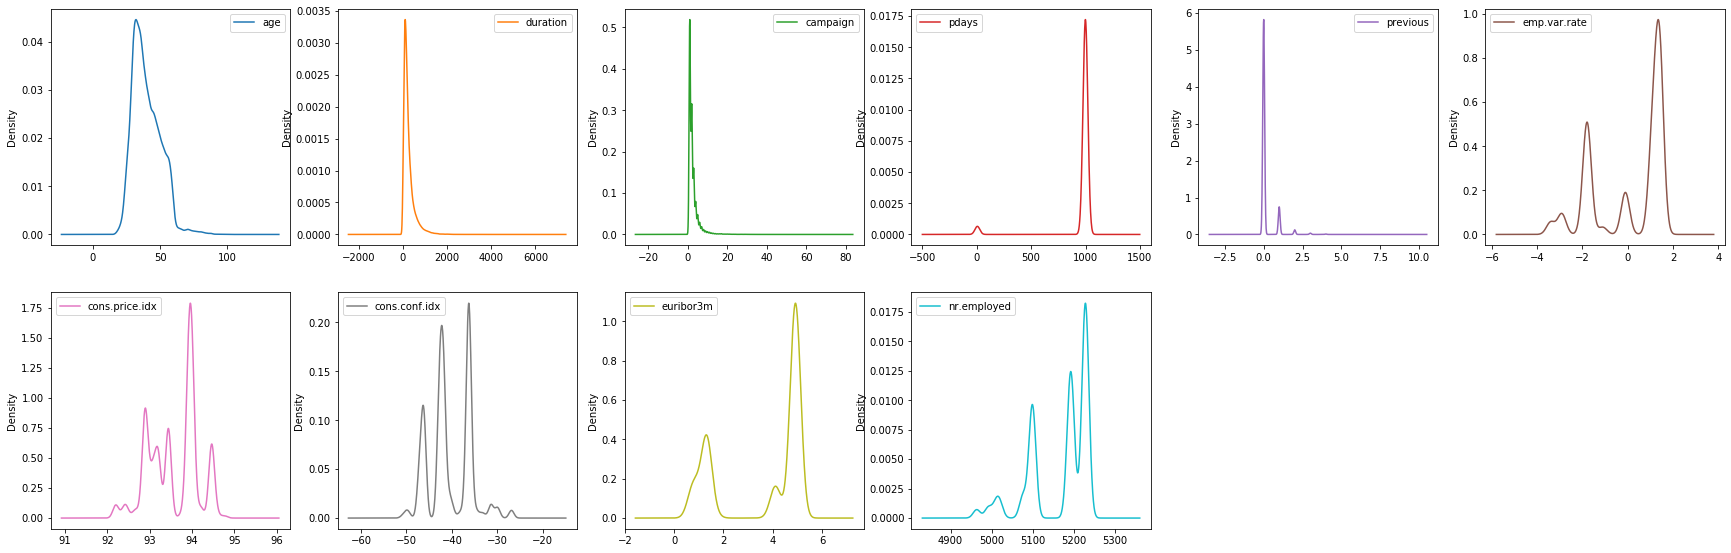

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,6), sharex=False, sharey=False, figsize=(30, 20))

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_encoded = df.apply(le.fit_transform)
print(df_encoded) 

       age  job  marital  education  ...  cons.conf.idx  euribor3m  nr.employed  y
0       39    3        1          0  ...             16        287            8  0
1       40    7        1          3  ...             16        287            8  0
2       20    7        1          3  ...             16        287            8  0
3       23    0        1          1  ...             16        287            8  0
4       39    7        1          3  ...             16        287            8  0
...    ...  ...      ...        ...  ...            ...        ...          ... ..
41183   56    5        1          5  ...              0        171            0  1
41184   29    1        1          5  ...              0        171            0  0
41185   39    5        1          6  ...              0        171            0  0
41186   27    9        1          5  ...              0        171            0  1
41187   57    5        1          5  ...              0        171            0  0

[41

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8175fd5c50>,
      dtype=object)

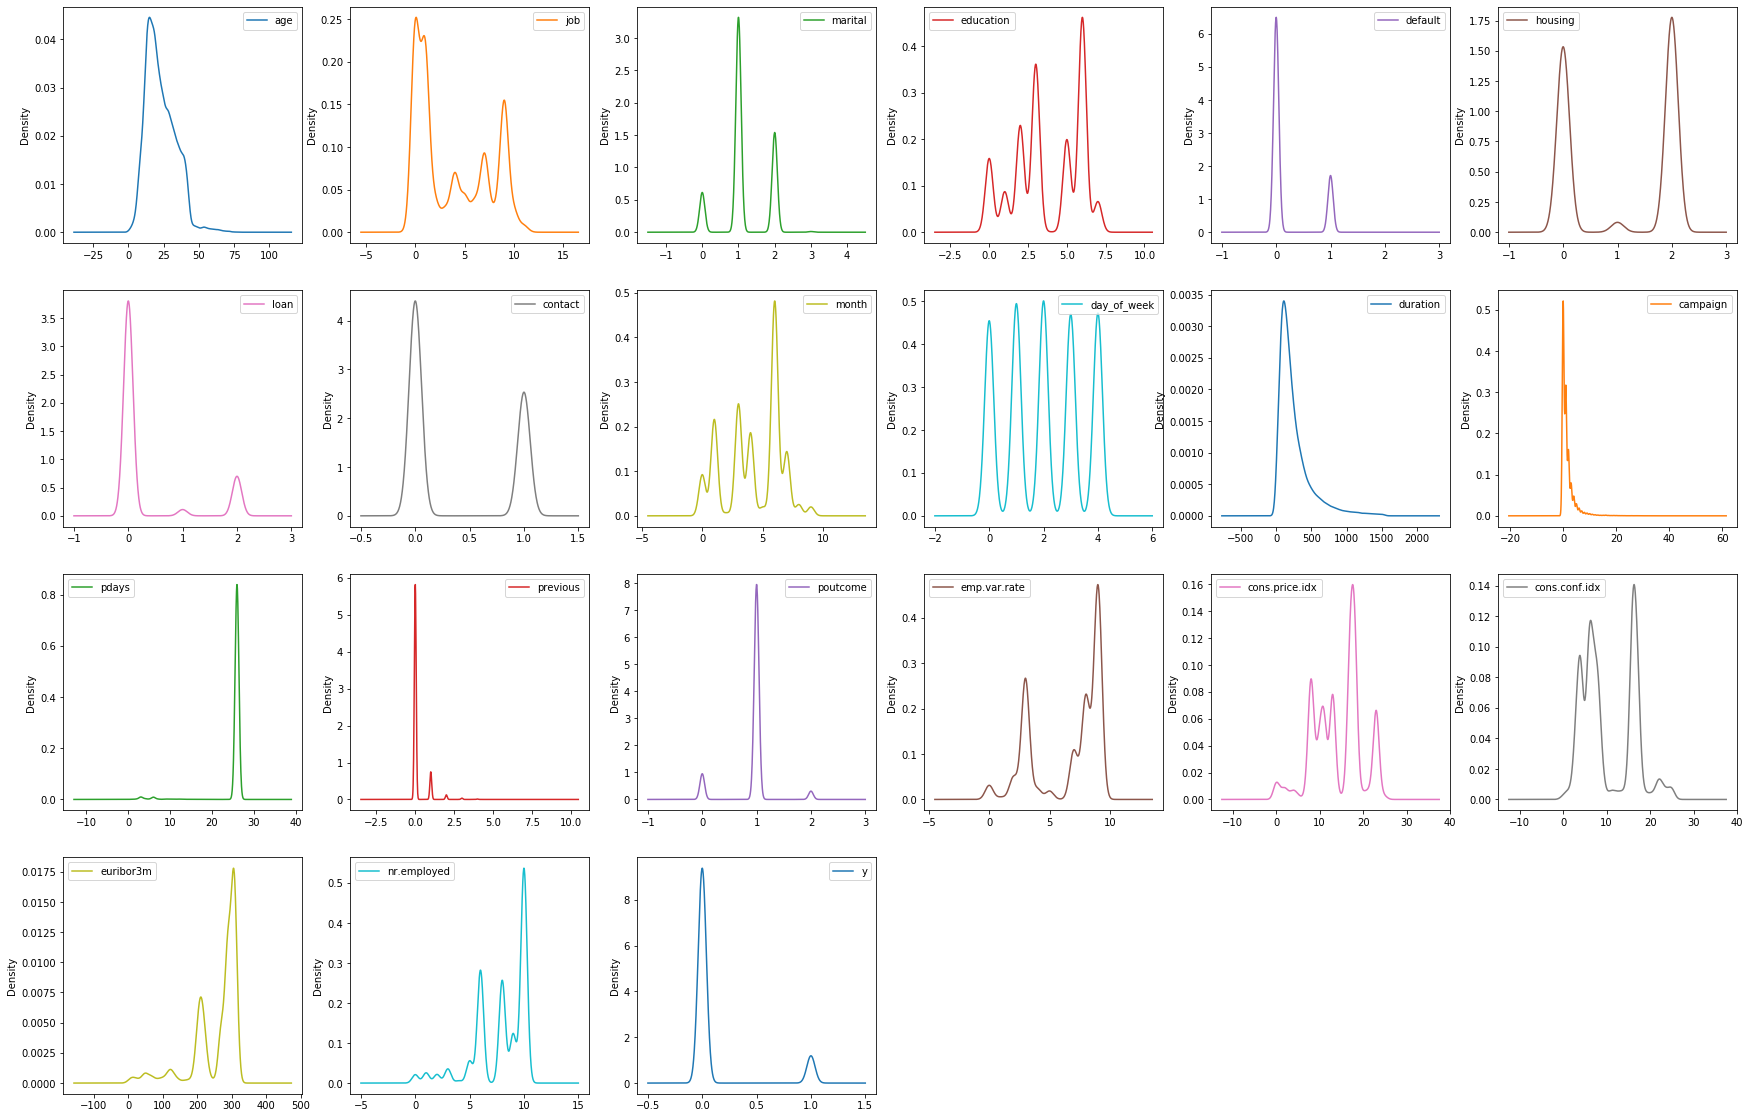

In [ ]:
df_encoded.plot(kind='density', subplots=True, layout=(4,6), sharex=False, sharey=False, figsize=(30, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f817571ddd8>,
      dtype=object)

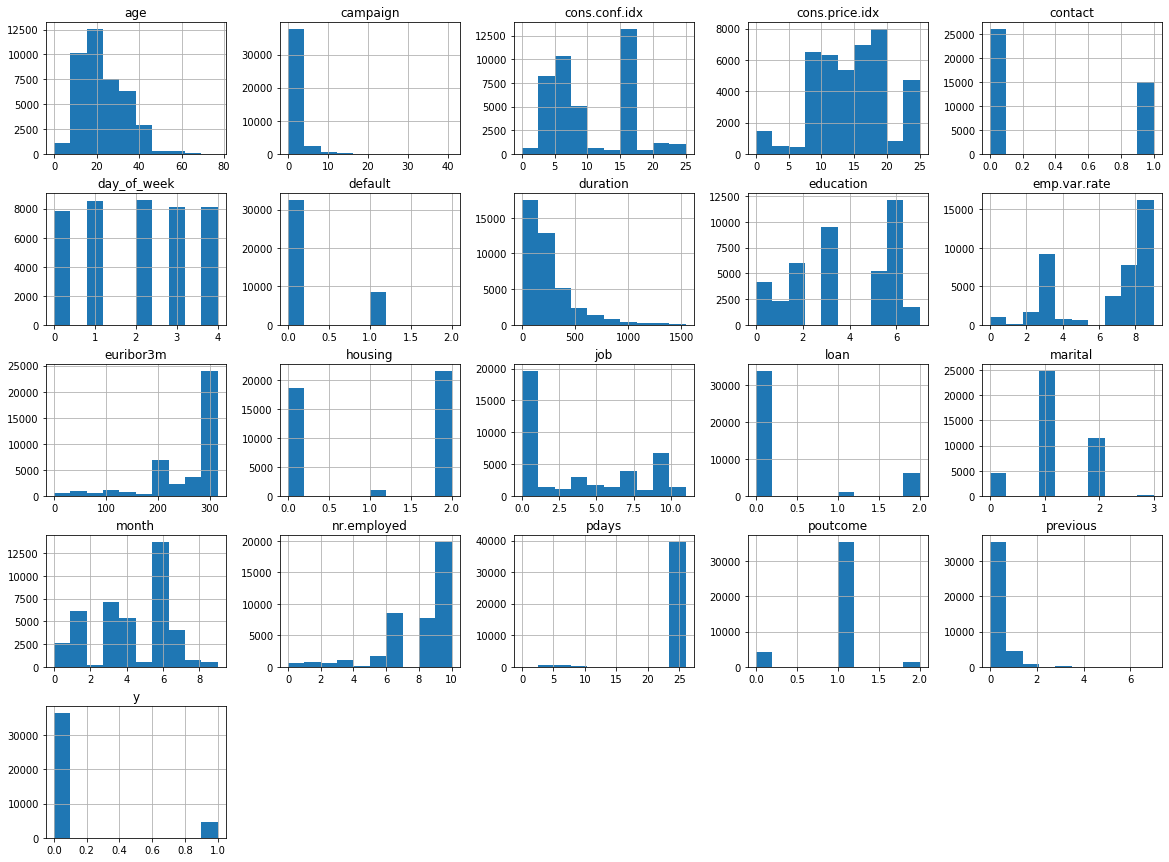

In [ ]:
df_encoded.hist( figsize=(20, 15))

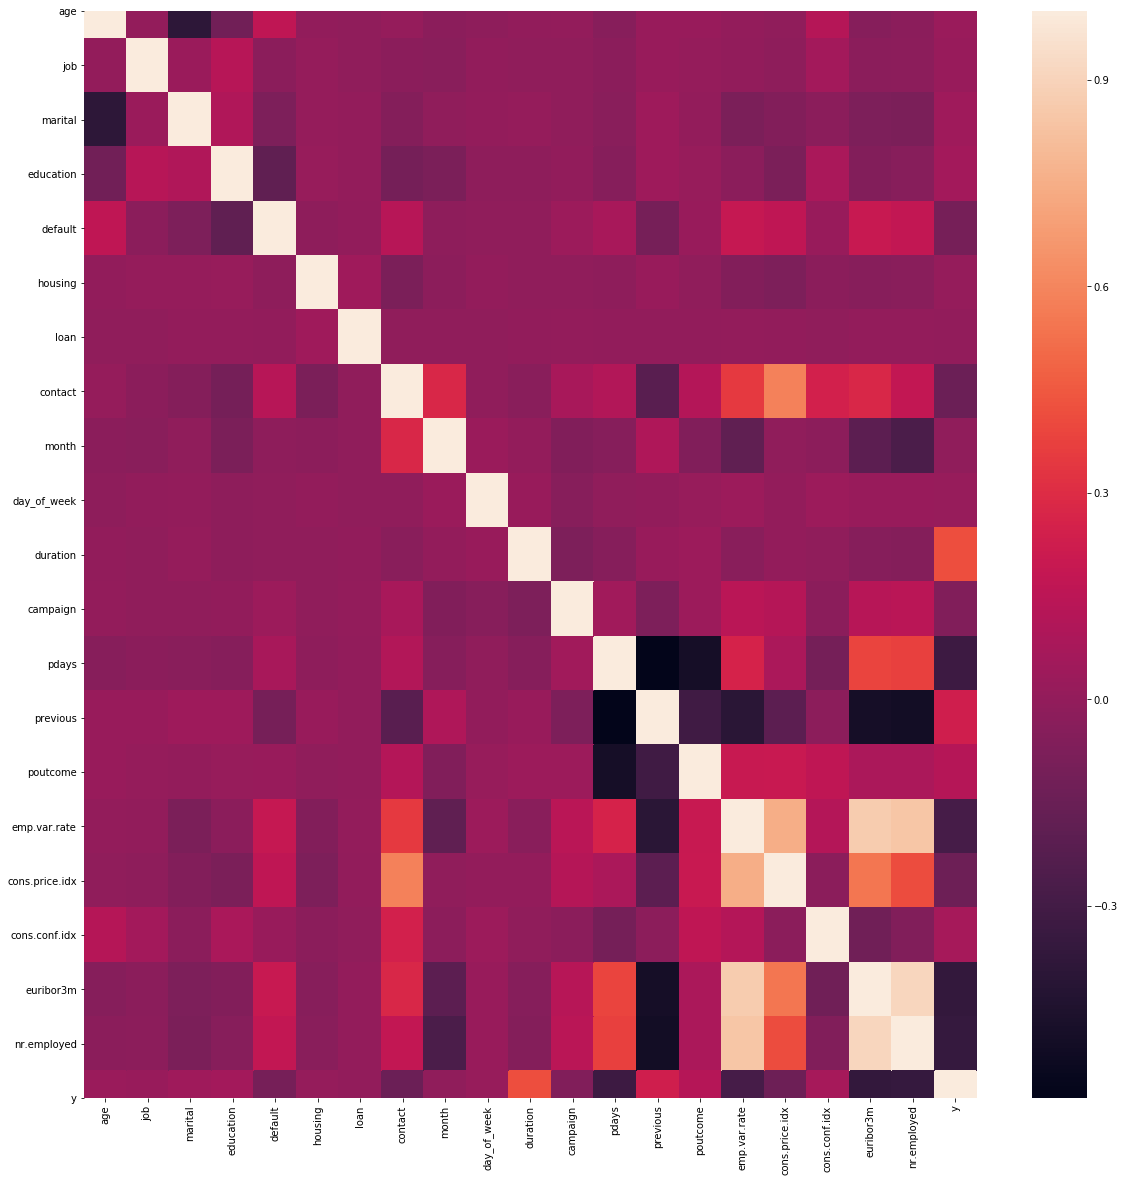

In [ ]:
#Correlation Matrix

%matplotlib inline

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
corr = df_encoded.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns )

In [ ]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1,0.0012,-0.39,-0.12,0.16,-0.0016,-0.0074,0.0071,-0.025,-0.018,-0.00031,0.0047,-0.037,0.024,0.02,0.0023,-0.0061,0.13,-0.048,-0.026,0.03
job,0.0012,1,0.028,0.13,-0.028,0.007,-0.01,-0.025,-0.033,-0.00084,-0.0063,-0.0068,-0.028,0.021,0.012,-0.0036,-0.017,0.057,-0.025,-0.022,0.025
marital,-0.39,0.028,1,0.11,-0.079,0.01,0.0058,-0.055,-0.0076,0.0022,0.011,-0.0073,-0.036,0.039,0.0019,-0.082,-0.056,-0.028,-0.079,-0.08,0.046
education,-0.12,0.13,0.11,1,-0.19,0.017,0.0064,-0.11,-0.083,-0.018,-0.015,0.0002,-0.047,0.039,0.017,-0.028,-0.081,0.085,-0.058,-0.037,0.058
default,0.16,-0.028,-0.079,-0.19,1,-0.016,-0.0038,0.14,-0.016,-0.0087,-0.011,0.033,0.078,-0.1,0.023,0.19,0.17,0.02,0.19,0.18,-0.099
housing,-0.0016,0.007,0.01,0.017,-0.016,1,0.044,-0.082,-0.018,0.0033,-0.009,-0.011,-0.012,0.021,-0.012,-0.056,-0.079,-0.029,-0.041,-0.036,0.012
loan,-0.0074,-0.01,0.0058,0.0064,-0.0038,0.044,1,-0.0086,-0.0057,-0.0093,-0.0023,0.005,-0.00061,-0.0013,-0.0015,0.0013,-0.002,-0.012,0.0051,0.0055,-0.0049
contact,0.0071,-0.025,-0.055,-0.11,0.14,-0.082,-0.0086,1,0.28,-0.0096,-0.031,0.077,0.12,-0.21,0.12,0.35,0.58,0.24,0.27,0.18,-0.14
month,-0.025,-0.033,-0.0076,-0.083,-0.016,-0.018,-0.0057,0.28,1,0.028,0.004,-0.062,-0.047,0.1,-0.065,-0.19,-0.0064,-0.019,-0.2,-0.27,-0.0061
day_of_week,-0.018,-0.00084,0.0022,-0.018,-0.0087,0.0033,-0.0093,-0.0096,0.028,1,0.025,-0.038,-0.01,-0.0041,0.019,0.036,0.0022,0.035,0.023,0.023,0.016
